In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

In [ ]:
train = pd.read_csv('mnist_train.csv')
print(train.head())
print(train.info())
print("\n SHape of the dataset:", train.shape)

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
1      0    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
2      4    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
3      1    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
4      9    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 785 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8602 entries, 0 to 8601
Columns: 785 entries, label to 28x28
dtypes: float64(120), int64(665)
memory usage: 5

In [ ]:
#NaN values in the dataset ?
nan = train.isnull().sum()
print(nan[nan != 0])

24x21    1
24x22    1
24x23    1
24x24    1
24x25    1
        ..
28x24    1
28x25    1
28x26    1
28x27    1
28x28    1
Length: 120, dtype: int64


In [ ]:
#Displays 4 handwritten digit images
def display_digits(N):
    """Picks-up randomly N images within the 
    train dataset between 0 and 41999 and displays the images
    with 4 images/row"""
    
    train = pd.read_csv('mnist_train.csv')
    images = np.random.randint(low=0, high=8602, size=N).tolist()
    
    subset_images = train.iloc[images,:]
    subset_images.index = range(1, N+1)
    print("Handwritten picked-up digits: ", subset_images['label'].values)
    subset_images.drop(columns=['label'], inplace=True)

    for i, row in subset_images.iterrows():
        plt.subplot((N//8)+1, 8, i)
        pixels = row.values.reshape((28,28))
        plt.imshow(pixels, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.title('Randomly picked-up images from the training dataset')
    plt.show()

    return ""

Handwritten picked-up digits:  [0 8 8 2 2 1 8 7 7 3 3 7 9 0 0 8 7 0 6 7 5 4 0 2 6 2 1 1 2 9 9 2 7 4 1 3 2
 6 8 5]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


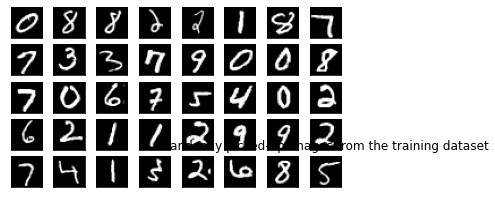

''

In [ ]:
display_digits(40)

In [ ]:
#Analyse the pixels intensity values
subset_pixels = train.iloc[:, 1:]
subset_pixels.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,8602.0,8602.0,8602.0,8602.0,8602.0,8602.0,8602.0,8602.0,8602.0,8602.0,...,8601.000000,8601.000000,8601.000000,8601.000000,8601.000000,8601.0,8601.0,8601.0,8601.0,8601.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.194629,0.108011,0.065923,0.040112,0.039181,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.757767,3.938018,3.578710,2.250611,2.208856,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,187.000000,154.000000,0.0,0.0,0.0,0.0,0.0


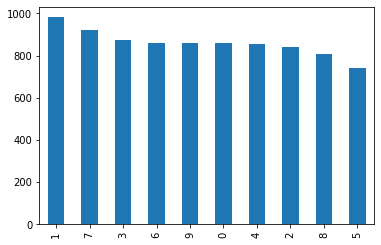

In [ ]:
#Distribution of the digits in the dataset
_ = train['label'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
def remove_constant_pixels(pixels_df):
    """Removes from the images the pixels that have a constant intensity value,
    either always black (0) or white (255)
    Returns the cleared dataset & the list of the removed pixels (columns)"""

    #Remove the pixels that are always black to compute faster
    changing_pixels_df = pixels_df.loc[:]
    dropped_pixels_b = []

    #Pixels with max value =0 are pixels that never change
    for col in pixels_df:
        if changing_pixels_df[col].max() == 0:
            changing_pixels_df.drop(columns=[col], inplace=True)
            dropped_pixels_b.append(col)
    print("Constantly black pixels that have been dropped: {}".format(dropped_pixels_b))


    #Same with pixels with min=255 (white pixels)
    dropped_pixels_w = []
    for col in changing_pixels_df:
        if changing_pixels_df[col].min() == 255:
            changing_pixels_df.drop(columns=[col], inplace=True)
            dropped_pixel_w.append(col)
    print("\n Constantly white pixels that have been dropped: {}".format(dropped_pixels_b))

    print(changing_pixels_df.head())
    print("Remaining pixels: {}".format(len(changing_pixels_df.columns)))
    print("Pixels removed: {}".format(784-len(changing_pixels_df.columns)))
    
    return changing_pixels_df, dropped_pixels_b + dropped_pixels_w

In [ ]:
train_pixels_df = pd.read_csv('mnist_train.csv').drop(columns=['label'])
train_changing_pixels_df, dropped_pixels = remove_constant_pixels(train_pixels_df)

Constantly black pixels that have been dropped: ['1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '1x10', '1x11', '1x12', '1x13', '1x14', '1x15', '1x16', '1x17', '1x18', '1x19', '1x20', '1x21', '1x22', '1x23', '1x24', '1x25', '1x26', '1x27', '1x28', '2x1', '2x2', '2x3', '2x4', '2x5', '2x6', '2x7', '2x24', '2x25', '2x26', '2x27', '2x28', '3x1', '3x2', '3x3', '3x4', '3x26', '3x27', '3x28', '4x1', '4x2', '4x3', '4x4', '4x26', '4x27', '4x28', '5x1', '5x2', '5x3', '5x28', '6x1', '6x2', '7x1', '7x2', '11x1', '12x1', '13x1', '14x1', '14x28', '15x1', '15x28', '16x1', '17x1', '18x1', '19x1', '20x1', '20x2', '21x1', '22x1', '22x28', '23x1', '23x2', '23x28', '24x1', '24x2', '24x28', '25x1', '25x2', '25x3', '25x27', '25x28', '26x1', '26x2', '26x3', '26x26', '26x27', '26x28', '27x1', '27x2', '27x3', '27x25', '27x26', '27x27', '27x28', '28x1', '28x2', '28x3', '28x4', '28x5', '28x24', '28x25', '28x26', '28x27', '28x28']

 Constantly white pixels that have been dropped: ['1x1', '1x2', '1

In [ ]:
#To save time and not have to run the entire function
DROPPED_PIX = ['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 
               'pixel10', 'pixel11', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 
               'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 
               'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel82', 'pixel83', 'pixel84', 
               'pixel85', 'pixel111', 'pixel112', 'pixel139', 'pixel140', 'pixel141', 'pixel168', 'pixel196', 
               'pixel392', 'pixel420', 'pixel421', 'pixel448', 'pixel476', 'pixel532', 'pixel560', 'pixel644', 
               'pixel645', 'pixel671', 'pixel672', 'pixel673', 'pixel699', 'pixel700', 'pixel701', 'pixel727', 
               'pixel728', 'pixel729', 'pixel730', 'pixel731', 'pixel754', 'pixel755', 'pixel756', 'pixel757', 
               'pixel758', 'pixel759', 'pixel760', 'pixel780', 'pixel781', 'pixel782', 'pixel783']
train_changing_pixels_df = pd.read_csv('mnist_train.csv', index_col=0)
print(train_changing_pixels_df.head())
train = pd.read_csv('mnist_train.csv')
print(train.head())

       1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
label                                                     ...                 
5        0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
0        0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
4        0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
1        0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
9        0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   

       28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
label                                                          
5        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
9        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0 

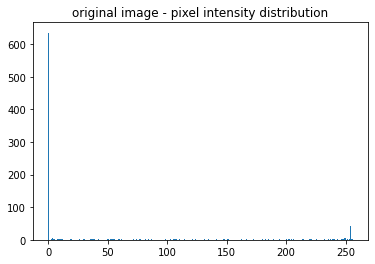

In [ ]:
#Pick-up one random image from original training set
i = np.random.randint(low=0, high=8602, size=1).tolist()[0]
pixels = train.iloc[i, 1:]
image = train.iloc[i, 1:].values.reshape((28,28))

#Pixel intensity hstogram
plt.hist(pixels, bins=256, range=(0,256))
plt.title('original image - pixel intensity distribution')
plt.show()

#Rescaling the intensity
pmin, pmax = image.min(), image.max()
rescaled_image = 255*(image-pmin) / (pmax - pmin)
rescaled_pixels = rescaled_image.flatten()

#Only black or white pixels
bw_pixels = pixels.apply(lambda x: 0 if x<128 else 255)
bw_image = bw_pixels.values.reshape((28,28))

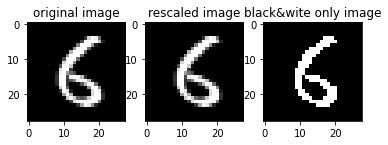

In [ ]:
#Visual comparison of images
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('original image')
plt.subplot(1, 3, 2)
plt.imshow(rescaled_image, cmap='gray')
plt.title('rescaled image')
plt.subplot(1, 3, 3)
plt.imshow(bw_image, cmap='gray')
plt.title('black&wite only image')
plt.show()

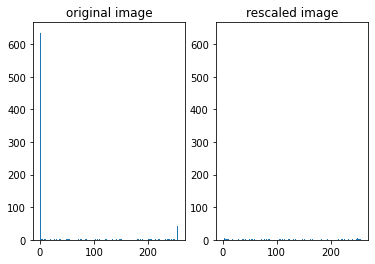

In [ ]:
#Visual Histogram comparison
plt.subplot(1, 2, 1)
plt.hist(pixels, bins=256, range=(0,256))
plt.title('original image')
plt.subplot(1, 2, 2)
plt.hist(rescaled_pixels, bins=256, range=(0,256))
plt.title('rescaled image')
plt.show()

In [ ]:
#Preparing samples and labels arrays
#s = np.random.randint(low=0, high=42001, size=1050).tolist()
samples = train_changing_pixels_df.values  #.iloc[s, :]
digits = train['label'].tolist()  #.iloc[s, :]
print(samples.shape)

(8602, 784)
